## Technical interview
By Joost van der Linden, February 11th, 2019.

### Part 2: Data exploration
Tasks covered: data transformation, exploration & visualization.

In [1]:
# To auto-reload scripts from /src:
%load_ext autoreload
%autoreload 1

import os
import sys
src_dir = os.path.join(os.getcwd(), 'src')
sys.path.append(src_dir)
% aimport my_viz
import my_viz

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1.0)

data_dir = '../data'

In [3]:
dfa = pd.read_pickle(data_dir + '/processed/adult-train-preprocessed.pickle')

### 2.1 Distributions
#### 2.1.1 How is the adult data distributed?

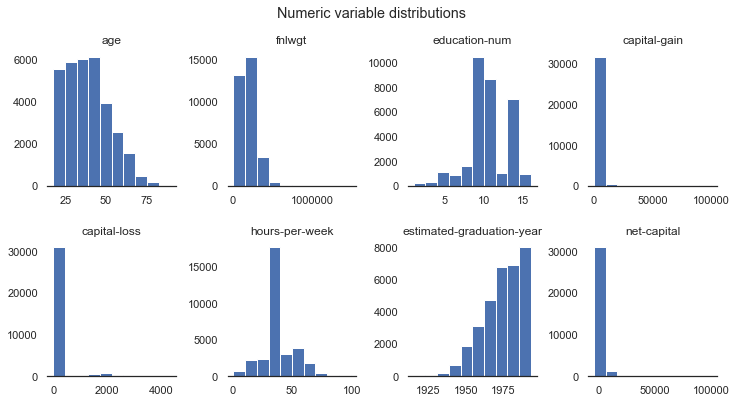

In [4]:
numeric_columns = [c for c in dfa if np.issubdtype(dfa[c].dtype, np.number)]
fig, axs = my_viz.distribution_overview(dfa[numeric_columns], is_numeric = True)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

- More recent graduates, because there are more young people

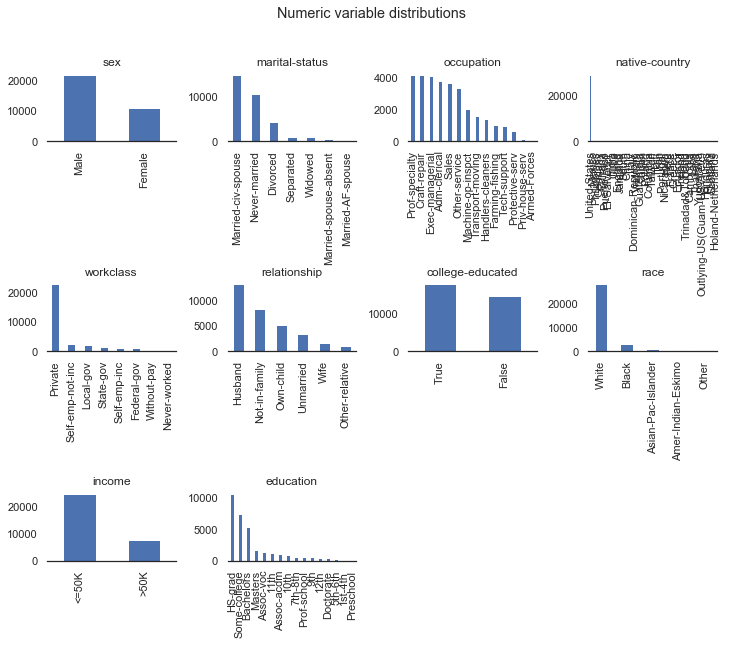

In [5]:
categorical_columns = list(set(dfa.columns) - set(numeric_columns))
fig, axs = my_viz.distribution_overview(dfa[categorical_columns], is_numeric = False)
plt.subplots_adjust(hspace = 2, wspace = 0.4)

In [6]:
dfa['native-country'].value_counts(normalize = True).head(3)*100

United-States    91.218963
Mexico            2.010757
Philippines       0.619176
Name: native-country, dtype: float64

- Mostly male, white people from the USA
- Class imbalance present in most categorical variables

### 2.2 Correlations
#### 2.2.1 How does `college-educated` correlate with other variables?

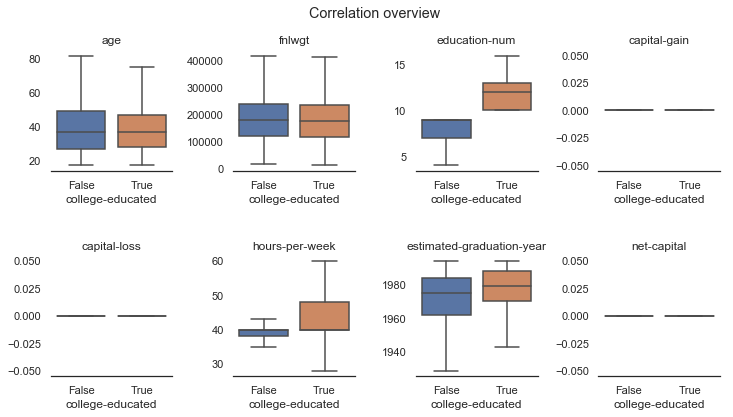

In [7]:
fig, axs = my_viz.correlation_overview(dfa, numeric_columns, target = 'college-educated', is_numeric = True)
plt.subplots_adjust(hspace = 0.7, wspace = 0.5)

* Promising features: `hours-per-week` (valid) and `estimated-graduation-year` (not valid: knowledge leak!)
* Issue with `capital` features

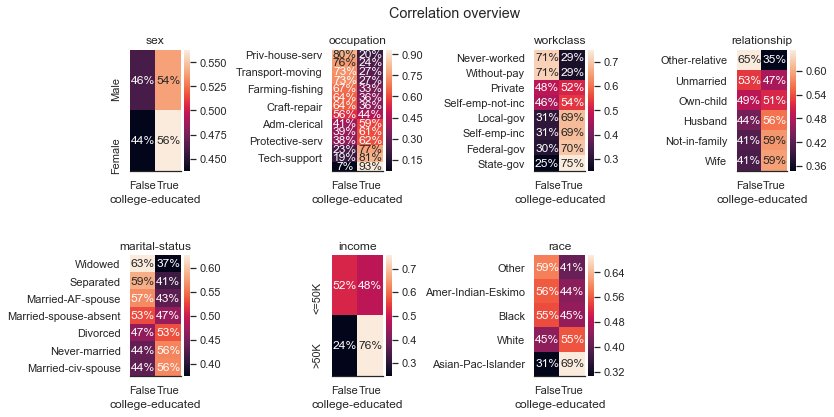

In [8]:
cat_columns = list(set(categorical_columns) - set(['native-country', 'education', 'college-educated']))
fig, axs = my_viz.correlation_overview(dfa, columns = cat_columns, target = 'college-educated', is_numeric = False)
plt.subplots_adjust(hspace = 0.7, wspace = 2.2)

* Promising features: `workclass` and `income` (as expected)
* (will use tree-based model later)

### 2.3 Variations by age
#### 2.3.1 How does `college-educated` vary by age?

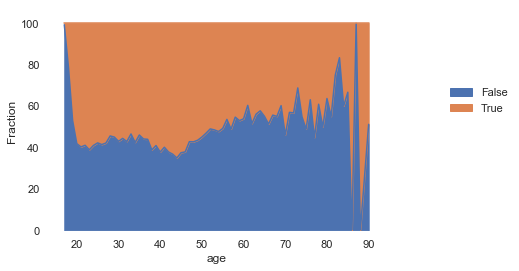

In [9]:
fig, ax = my_viz.stacked_categorical(dfa, 'college-educated', legend_loc = (1.4, 0.7))

`age` might be a useful feature after all?

#### 2.3.1 Extra: how does `income` vary by age?

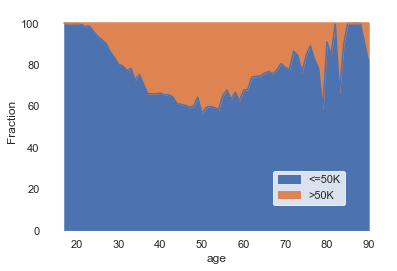

In [10]:
fig, ax = my_viz.stacked_categorical(dfa, 'income')

#### 2.3.1 Extra: how does `relationship` vary by age?

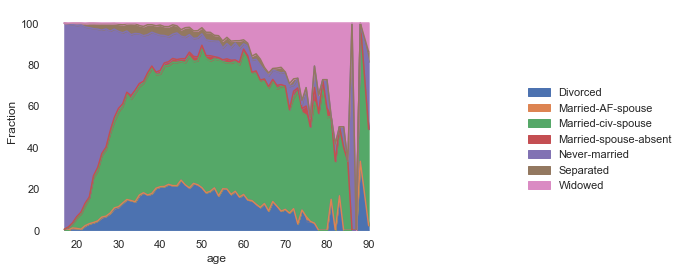

In [11]:
fig, ax = my_viz.stacked_categorical(dfa, 'marital-status', legend_loc = (1.4, 0.7))